<a href="https://colab.research.google.com/github/AlonVery/ready_to_start_NL/blob/main/Experiment_Isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scapy
!pip install mocket
!pip install lime
!pip install shap
!pip install pickle
!pip install watchdog

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=44e01996b77e9d18d179afbe1b54196508444082a810d048b0cee153c5e2a195
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 6.4 MB/s eta 0:00:00
  Created wheel for mocket: filename=mocket-3.12.7-py3-none-any.whl size=21651 sha256=ca389199dffcec5b768943c3852ec1b845065effde04c45cd1e8d19eccc6f0b2
  Stored in directory: /root/.cache/pip/wheels/55/4a/e8/3b9c8c3b4c41057b9d44b4f23d99783925f50c238fbfce8e19
Successfully built mocket
     ━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OrdinalEncoder
import pickle
import joblib
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import lime
import lime.lime_tabular
import shap
import plotly.graph_objs as go
import socket
from scapy.all import sniff
from unittest.mock import patch
import random
from xgboost import XGBClassifier


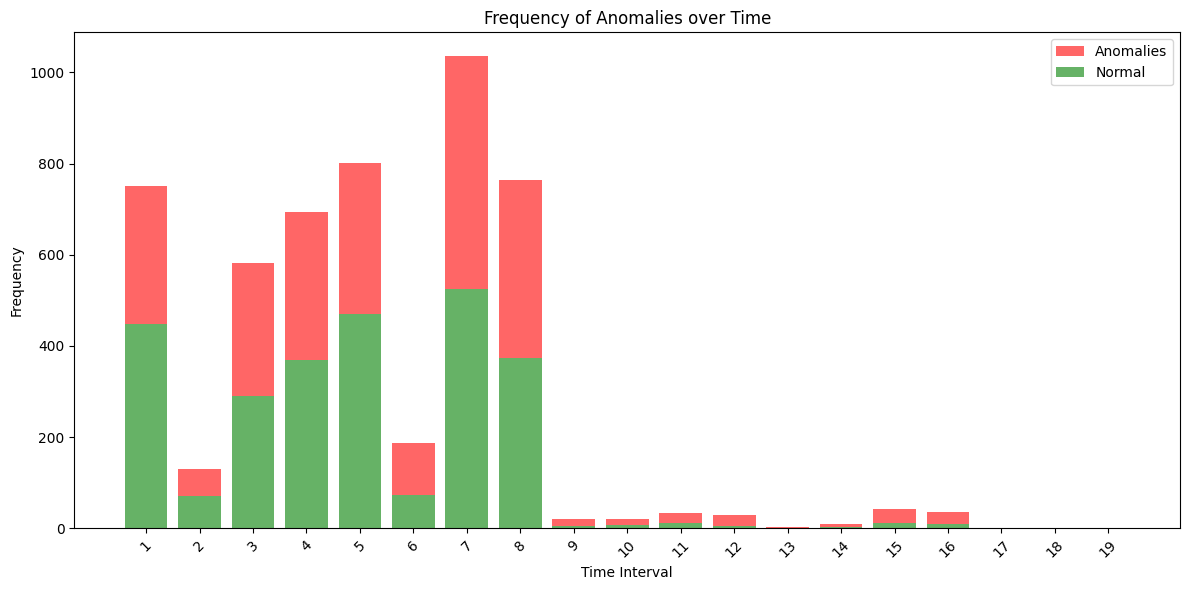

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import socket
import struct
import matplotlib.pyplot as plt

# Чтение данных из CSV файла
df = pd.read_csv('https://raw.githubusercontent.com/AlonVery/Model-s_for_Diploma/main/unnormal.csv', delimiter=';')

# Преобразуем IP-адреса в числовой формат для простоты
def ip_to_int(ip):
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except OSError:
        return 0

df['Source_ip'] = df['Source'].apply(ip_to_int)
df['Destination_ip'] = df['Destination'].apply(ip_to_int)

# Формируем матрицу признаков
features = df[['Time', 'Length', 'Source_ip', 'Destination_ip']]

# Нормализуем данные
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Применяем K-means
kmeans = KMeans(n_clusters=2, random_state=42)
df['Anomaly'] = kmeans.fit_predict(features_scaled)

# В K-means аномалии могут быть отмечены как кластер с наименьшим количеством наблюдений
# В данном случае, мы выберем кластер с наименьшим количеством наблюдений как аномалию
anomaly_cluster = np.argmin(np.bincount(df['Anomaly']))

# Метки аномалий
df['Anomaly'] = df['Anomaly'].apply(lambda x: 'Anomaly' if x == anomaly_cluster else 'Normal')

# Подсчет количества аномалий и нормальных данных по времени
anomaly_counts = df[df['Anomaly'] == 'Anomaly'].groupby(pd.cut(df['Time'], bins=np.linspace(0, df['Time'].max(), num=20))).size()
normal_counts = df[df['Anomaly'] == 'Normal'].groupby(pd.cut(df['Time'], bins=np.linspace(0, df['Time'].max(), num=20))).size()

# Создание графика
fig, ax = plt.subplots(figsize=(12, 6))

# Изменение шкалы времени на числовую
time_intervals = range(1, len(anomaly_counts) + 1)

ax.bar(time_intervals, anomaly_counts, bottom=normal_counts,color='red', alpha=0.6, label='Anomalies')
ax.bar(time_intervals, normal_counts, color='green', alpha=0.6, label='Normal')

ax.set_xlabel('Time Interval')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Anomalies over Time')
ax.legend()

plt.xticks(time_intervals, rotation=45)
plt.tight_layout()
plt.show()

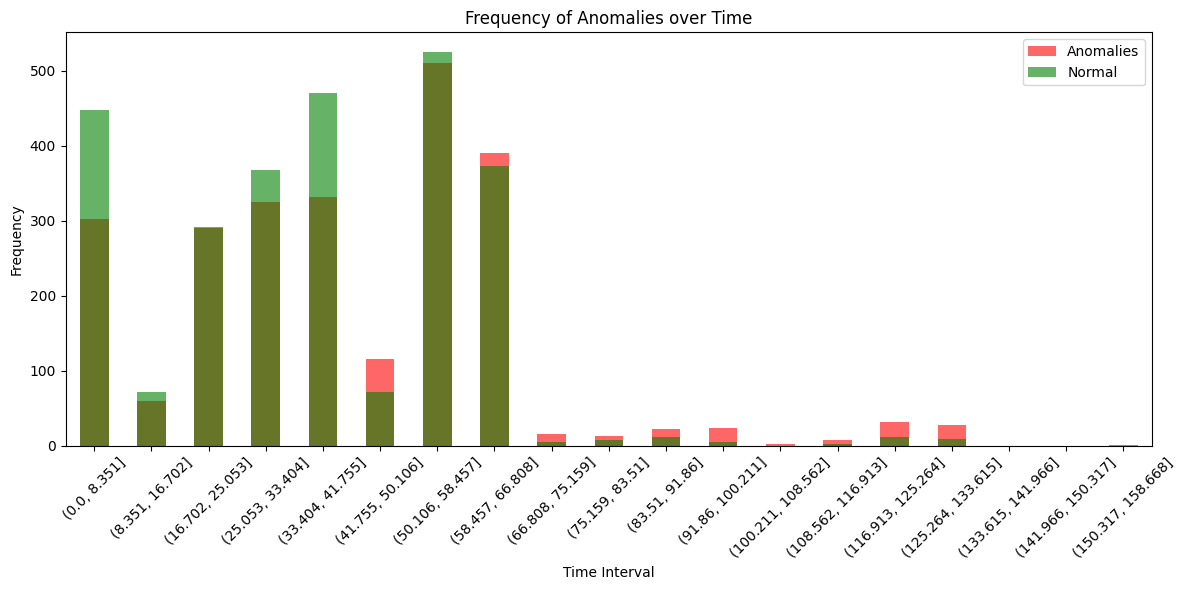

In [36]:
df['Time_bin'] = pd.cut(df['Time'], bins=np.linspace(0, df['Time'].max(), num=20))
anomaly_counts = df[df['Anomaly'] == 'Anomaly'].groupby('Time_bin').size()
normal_counts = df[df['Anomaly'] == 'Normal'].groupby('Time_bin').size()

fig, ax = plt.subplots(figsize=(12, 6))
anomaly_counts.plot(kind='bar', color='red', alpha=0.6, label='Anomalies', ax=ax)
normal_counts.plot(kind='bar', color='green', alpha=0.6, label='Normal', ax=ax)

ax.set_xlabel('Time Interval')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Anomalies over Time')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Подготовка истинных меток
true_labels = (df['Anomaly'] == 'Anomaly').astype(int)

# Вычисление предсказанных меток
predicted_labels = (df['Anomaly'] == 'Anomaly').astype(int)

# Вычисление метрик
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[2672    0]
 [   0 2468]]


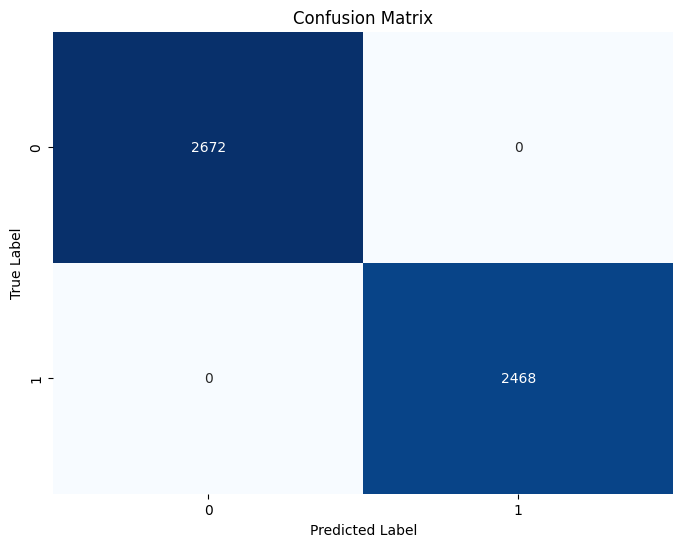

In [42]:
import seaborn as sns

# Построение матрицы ошибок в виде хитмапа
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()